### Data Loading and Preprocessing

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Give columns names
columns = [
"age", "class_of_worker", "industry_code", "occupation_code", "education", "wage_per_hour",
    "enrolled_in_edu", "marital_status", "major_industry_code", "major_occupation_code", "race",
    "hispanic_origin", "sex", "labor_union_member", "unemployment_reason", "employment_status",
    "capital_gains", "capital_losses", "dividends_from_stocks", "tax_filer_status", "region_prev_residence",
    "state_prev_residence", "household_family_status", "household_summary", "instance_weight", "migration_msa_change",
    "migration_region_change", "migration_within_region", "lived_in_this_house_1yr", "migration_sunbelt",
    "num_employers", "family_members_under_18", "country_of_birth_father", "country_of_birth_mother",
    "country_of_birth_self", "citizenship", "own_business", "taxable_income", "veterans_admin_questionnaire",
    "veterans_benefits", "weeks_worked", "income"
]

# Read in data
data = pd.read_csv('census-income.data', header=None, names=columns)

# Loop through data and fill in missing values with mode or average
for i in data.columns:
    if data[i].dtype == 'object':  
        data[i].fillna(data[i].mode()[0])
    else:  
        data[i].fillna(data[i].mean())

# One-hot encode cateogrical data
data = pd.get_dummies(data, drop_first=True)

# Print first few rows
print(data.head())



   age  industry_code  occupation_code  wage_per_hour  capital_gains  \
0   73              0                0              0              0   
1   58              4               34              0              0   
2   18              0                0              0              0   
3    9              0                0              0              0   
4   10              0                0              0              0   

   capital_losses  dividends_from_stocks  instance_weight  num_employers  \
0               0                      0          1700.09              0   
1               0                      0          1053.55              1   
2               0                      0           991.95              0   
3               0                      0          1758.14              0   
4               0                      0          1069.16              0   

   own_business  ...  country_of_birth_self_ United-States  \
0             0  ...                            

### Splitting the Data and Training the Model

In [5]:
# Get features and label
x = data.drop(columns=["income_ 50000+."])
y = data["income_ 50000+."]

# Split data into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Train the decision tree
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, y_train)

# Evaluate on test data
predicted = tree.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predicted))
print("Classification Report:\n", classification_report(y_test, predicted))

Accuracy: 0.9451860266969611
Classification Report:
               precision    recall  f1-score   support

       False       0.95      1.00      0.97     56204
        True       0.72      0.17      0.27      3653

    accuracy                           0.95     59857
   macro avg       0.83      0.58      0.62     59857
weighted avg       0.93      0.95      0.93     59857



### Visualizing the Decision Tree

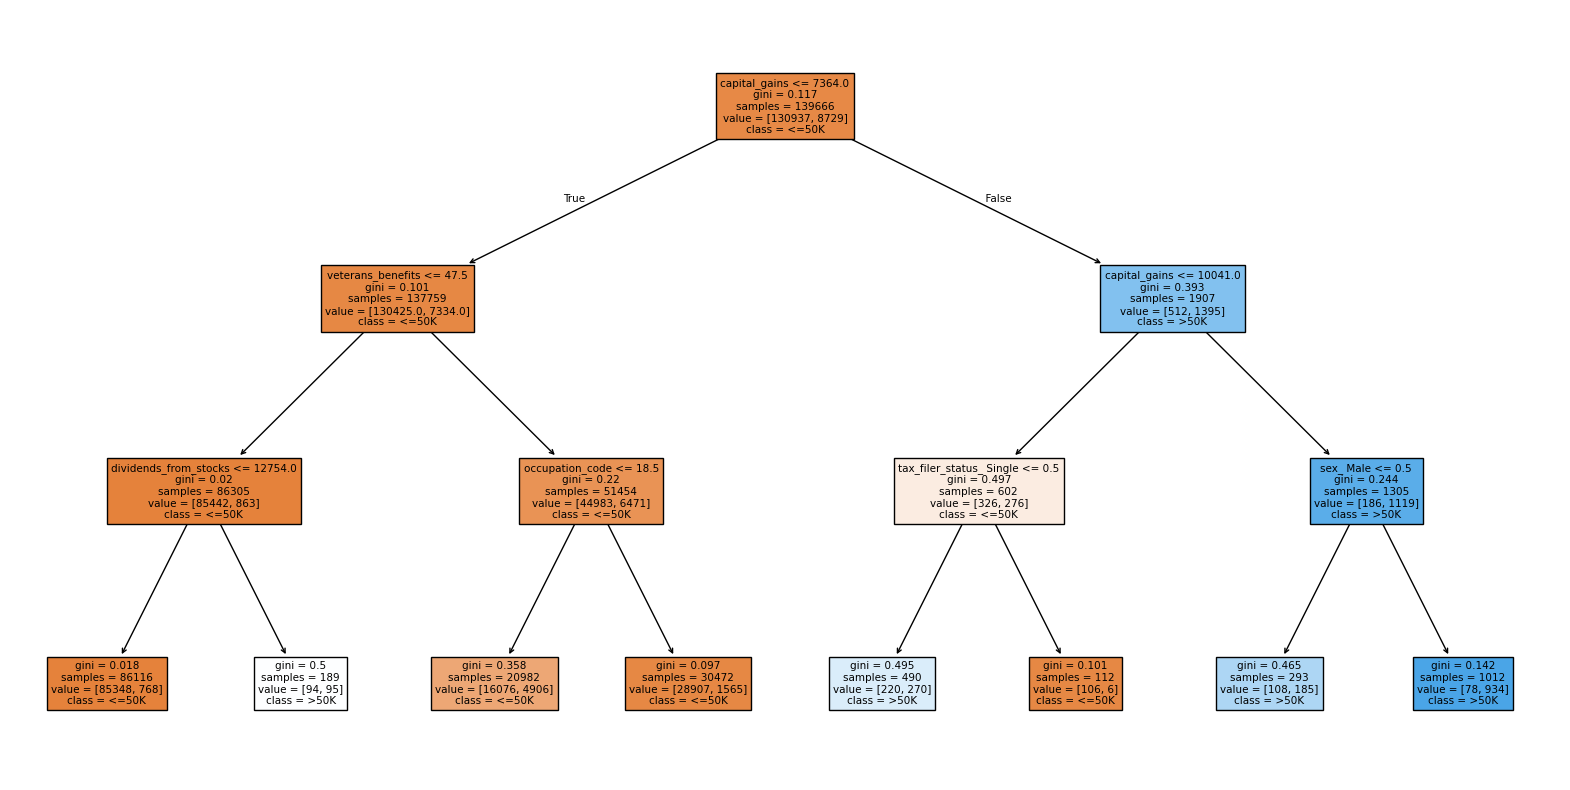

In [7]:
# Using plot tree to visualize tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=x.columns, class_names=["<=50K", ">50K"], filled=True)
plt.show()

### Feature Importance

In [9]:
# Printing the importance of each feature
importance = pd.DataFrame({"Feature": x.columns, "Importance": tree.feature_importances_})
importance = importance.sort_values(by="Importance", ascending=False)
print(importance.head(x.columns.size))

                                        Feature  Importance
4                                 capital_gains    0.499309
11                            veterans_benefits    0.231699
2                               occupation_code    0.221879
6                         dividends_from_stocks    0.024656
114                    tax_filer_status_ Single    0.012099
..                                          ...         ...
129  state_prev_residence_ District of Columbia    0.000000
128              state_prev_residence_ Delaware    0.000000
127           state_prev_residence_ Connecticut    0.000000
126              state_prev_residence_ Colorado    0.000000
380                         taxable_income_ Yes    0.000000

[381 rows x 2 columns]


A feature may be seen as more important if it reduces the impurity when the data is split around that feature. In this case, we see that capital_gains is much more important than the rest of the features, as it better divides the data than the other features. We can intuitively infer why this is the case, as capital gains are a form of income. Naturally, the higher ones capital gain, the higher there income would be too as theire is a direct link. In fact, you can see that the higher importance features are all linked to income in some way, which of course makes sense as this is exactly what a decision tree's job is.

### Evaluation on the Test Set

In [12]:
# Read in data
data2 = pd.read_csv('census-income.test', header=None, names=columns)

# One-hot encode cateogrical data
data2 = pd.get_dummies(data2, drop_first=True)

# Get features and label
x2 = data.drop(columns=["income_ 50000+."])
y2 = data["income_ 50000+."]

# Evaluate on test data
predicted2 = tree.predict(x2)
print("Accuracy:", accuracy_score(y2, predicted2))
print("Classification Report:\n", classification_report(y2, predicted2))

Accuracy: 0.9447382006084512
Classification Report:
               precision    recall  f1-score   support

       False       0.95      1.00      0.97    187141
        True       0.74      0.17      0.28     12382

    accuracy                           0.94    199523
   macro avg       0.84      0.58      0.62    199523
weighted avg       0.93      0.94      0.93    199523

